In [1]:
import seaborn as sns

In [2]:
import scipy.stats as stats

In [3]:
df = sns.load_dataset('diamonds')

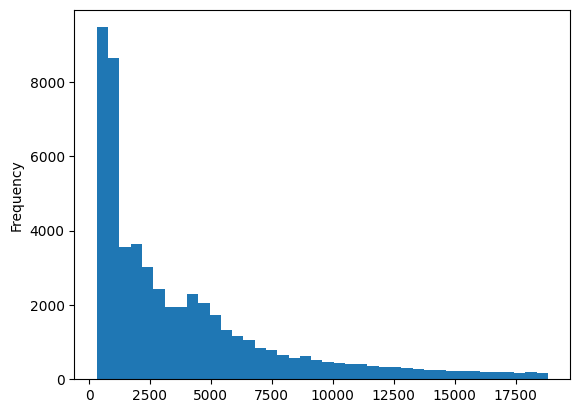

In [4]:
df['price'].plot.hist(bins=40);

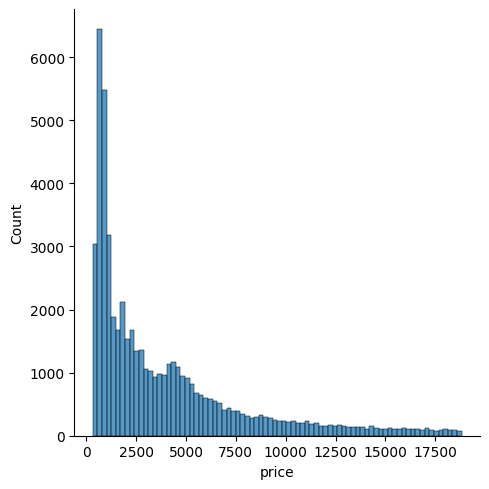

In [5]:
sns.displot(data=df, x='price');

In [6]:
df.loc[:, 'price'].describe().round(2)

count    53940.00
mean      3932.80
std       3989.44
min        326.00
25%        950.00
50%       2401.00
75%       5324.25
max      18823.00
Name: price, dtype: float64

In [7]:
df.loc[:, 'price'].mean()

np.float64(3932.799721913237)

In [8]:
df.loc[:, 'price'].std()

np.float64(3989.439738146379)

In [9]:
df.loc[:, 'price'].agg(('mean', 'std'))

mean    3932.799722
std     3989.439738
Name: price, dtype: float64

In [10]:
dict_price_summary = df.loc[:, 'price'].describe().round(2).loc[['mean', 'std']].to_dict()

In [11]:
dict_price_summary['mean']

3932.8

In [12]:
dict_price_summary['std']

3989.44

In [13]:
import pandas as pd

In [14]:
pd.cut(df['price'], bins=range(0, 20_000, 1_000)).value_counts(normalize=True).round(2)

price
(0, 1000]         0.27
(1000, 2000]      0.18
(2000, 3000]      0.11
(4000, 5000]      0.09
(3000, 4000]      0.08
(5000, 6000]      0.06
(6000, 7000]      0.04
(7000, 8000]      0.03
(8000, 9000]      0.02
(9000, 10000]     0.02
(10000, 11000]    0.02
(11000, 12000]    0.02
(12000, 13000]    0.01
(13000, 14000]    0.01
(15000, 16000]    0.01
(14000, 15000]    0.01
(16000, 17000]    0.01
(17000, 18000]    0.01
(18000, 19000]    0.01
Name: proportion, dtype: float64

In [15]:
701/53940

0.012995921394141638

In [16]:
mu1, sig1 = stats.expon.fit(df.price)

In [17]:
stats.expon.cdf(x=1001, loc=mu1, scale=sig1)

np.float64(0.1706777810616862)

In [18]:
stats.expon.cdf(x=13000, loc=mu1, scale=sig1) - stats.expon.cdf(x=12000, loc=mu1, scale=sig1)

np.float64(0.009514756287918202)

In [19]:
from vega_datasets import data
cars = data.cars()


    Import that data using pandas and explore it.
    Draw histograms for the mileage of automatic and manual cars.
    Which distribution would you use to model these? Why?
    Find that probability that the mileage of a) automatic b) manual cars could be higher than 25 using parametric methods.
    Find a) and b) above again, but this time only use non-parametric methods
    Compare the results. Is there a difference? Why?


In [20]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [21]:
cars.Origin.value_counts()

Origin
USA       254
Japan      79
Europe     73
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

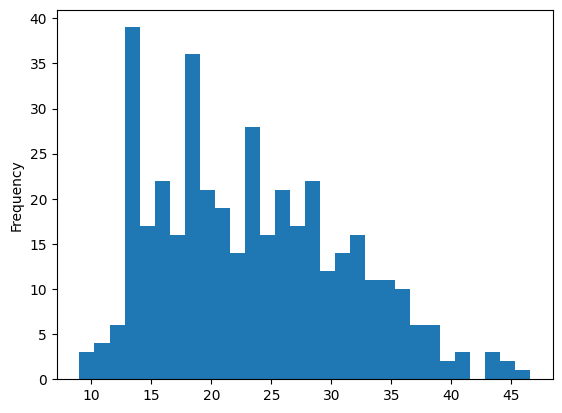

In [22]:
cars['Miles_per_Gallon'].plot.hist(bins=30)

In [23]:
srs_mpg_usa = cars.query("Origin=='USA'").loc[:, 'Miles_per_Gallon'].dropna()

<Axes: ylabel='Frequency'>

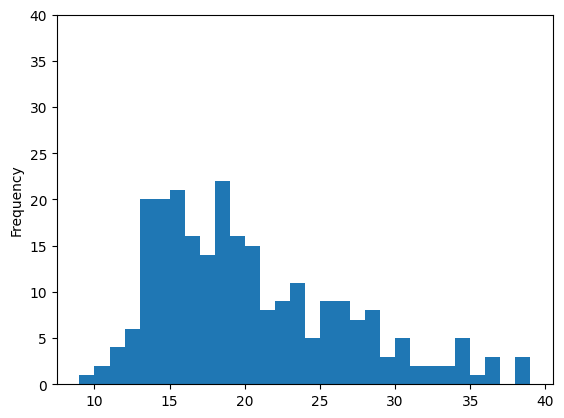

In [24]:
srs_mpg_usa.plot.hist(bins=30, ylim=(0, 40))

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

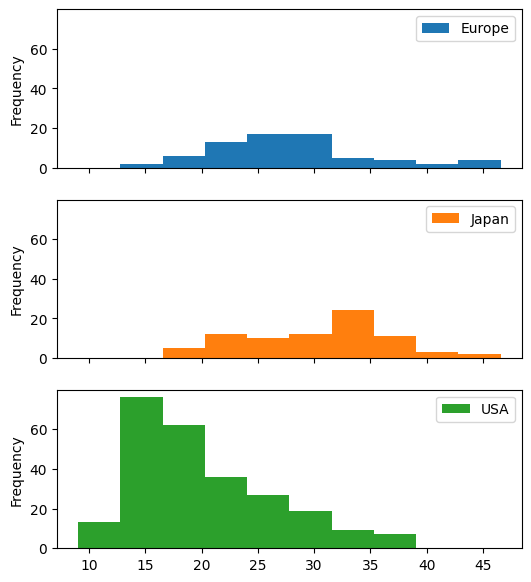

In [25]:
cars.pivot(columns='Origin', values='Miles_per_Gallon').plot.hist(subplots=True, sharex=True, sharey=True, figsize=(6, 7))

In [26]:
from scipy.stats import norm

In [27]:
mu, sig = norm.fit(srs_mpg_usa)

In [28]:
mu, sig

(np.float64(20.083534136546184), np.float64(6.390021868331153))

In [29]:
1 - norm.cdf(25, loc=mu, scale=sig)

np.float64(0.2208287319619191)

In [30]:
from random import choice

In [31]:
def flip_coin():
    """
    """
    return pd.Series([choice(['H', 'T']) for run in range(100)]).value_counts(normalize=True).loc['H']

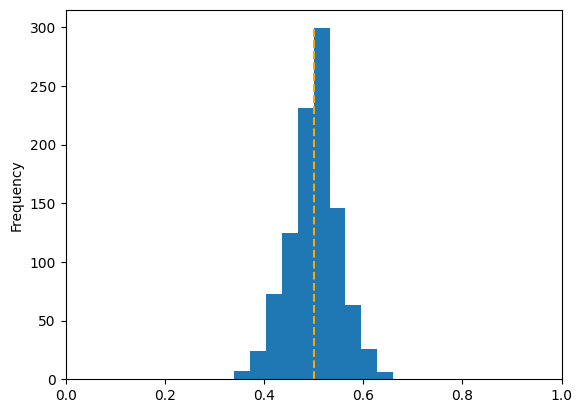

In [32]:
ax = pd.Series([flip_coin() for x in range(1000)]).plot.hist(xlim=(0, 1))

ax.vlines(x=0.5, ymin=0, ymax=300, color='orange', linestyle='dashed')

In [33]:
df['price'].mean()

np.float64(3932.799721913237)

In [34]:
srs_diamonds_avg = pd.Series([df['price'].sample(20000).mean() for x in range(100)])

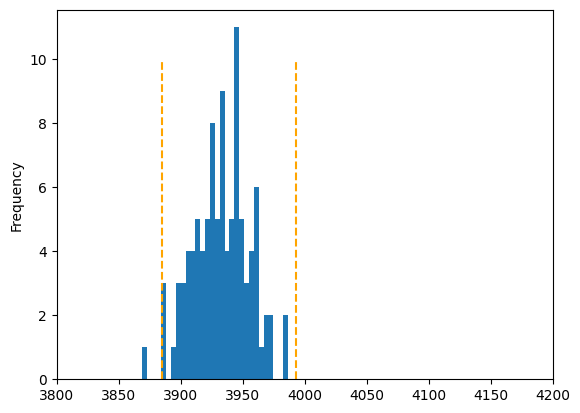

In [35]:
ax = srs_diamonds_avg.plot.hist(bins=30, xlim=(3800, 4200))
ax.vlines(x=3885, ymin=0, ymax=10,color='orange', linestyle='dashed')
ax.vlines(x=3993, ymin=0, ymax=10,color='orange', linestyle='dashed')

In [36]:
cars.loc[:, ['Miles_per_Gallon', 'Horsepower']].corr()
# Weight_in_lbs

,Miles_per_Gallon,Horsepower
Miles_per_Gallon,1.000000,-0.778427
Horsepower,-0.778427,1.000000


<Axes: xlabel='Miles_per_Gallon', ylabel='Horsepower'>

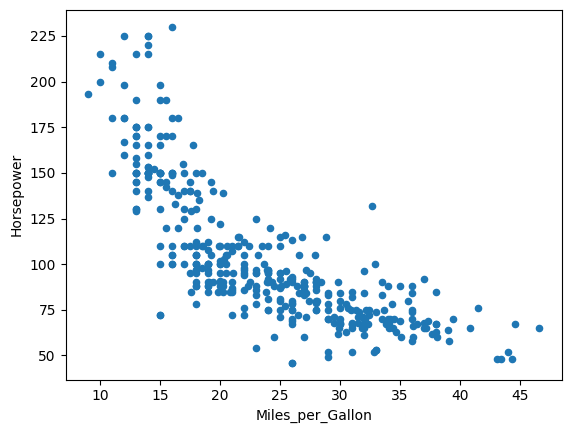

In [37]:
cars.loc[:, ['Miles_per_Gallon', 'Horsepower']].plot.scatter(x='Miles_per_Gallon', y='Horsepower')

In [38]:
cars.loc[:, ['Miles_per_Gallon', 'Horsepower', 'Weight_in_lbs']].corr().round(2).loc['Miles_per_Gallon'].drop('Miles_per_Gallon')

Horsepower      -0.78
Weight_in_lbs   -0.83
Name: Miles_per_Gallon, dtype: float64

In [39]:
cars.loc[:, ['Miles_per_Gallon', 'Horsepower', 'Weight_in_lbs']].head(1)

,Miles_per_Gallon,Horsepower,Weight_in_lbs
0,18.0,130.0,3504


In [40]:
(cars
 .loc[:, ['Miles_per_Gallon', 'Horsepower', 'Weight_in_lbs']]
 .apply(lambda col: col.subtract(col.mean()).divide(col.std()))
 .corr()
)

,Miles_per_Gallon,Horsepower,Weight_in_lbs
Miles_per_Gallon,1.000000,-0.778427,-0.831741
Horsepower,-0.778427,1.000000,0.866586
Weight_in_lbs,-0.831741,0.866586,1.000000


In [41]:
(cars
 .loc[:, ['Miles_per_Gallon', 'Horsepower', 'Weight_in_lbs']]
 .apply(lambda col: col.subtract(col.mean()).divide(col.std()))
 .head(1)
)

,Miles_per_Gallon,Horsepower,Weight_in_lbs
0,-0.705551,0.642721,0.619343


In [42]:
(-0.77 * 0.642) + (-0.83 * 0.619)

-1.0081099999999998

In [43]:
df_lr = \
(cars
 .loc[:, ['Miles_per_Gallon', 'Horsepower', 'Weight_in_lbs']]
 .apply(lambda col: col.subtract(col.mean()).divide(col.std()))
 .dropna()
)

In [44]:
X = df_lr[['Horsepower']]
y = df_lr['Miles_per_Gallon']

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model_lr = LinearRegression()

In [47]:
model_lr.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
model_lr.intercept_

np.float64(-0.021165732832969235)

In [49]:
model_lr.coef_

array([-0.78294011])

<br>We can write the regression equation as: <br>
$y = -0.021 + (-0.782 * x)$<br><br>

<AxesSubplot:xlabel='Miles_per_Gallon', ylabel='mpg_model'>

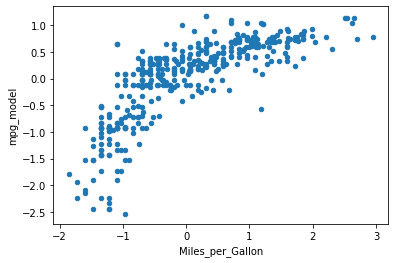

In [254]:
(df_lr
 .assign(mpg_model=lambda fr: -0.021 + (-0.782  * fr['Horsepower']))
 .loc[:, ['Miles_per_Gallon', 'mpg_model']]
 .plot
 .scatter(x='Miles_per_Gallon', y='mpg_model')
)